# <font color=blue>InstaSize User Data Analysis</font>

***

## Goal
Study the InstaSize user data to identify trends that will help the app developers to increase app engagement and user retention.

## Important notes/references

From Ref : https://clearbridgemobile.com/5-methods-for-increasing-app-engagement-user-retention/ <br>
Engagement – describes how active users are on the application. While this is a somewhat subjective metric, Localytics describes highly engaged users as those that have 10+ sessions per month.<br>

 

Retention – while again a somewhat subjective term, the industry benchmark is the percentage of an app’s users who return to the app within three months of their first session. Localytics even defines mobile app user retention as a user that returns to the app at least 1x within 30 days. It’s important to note that every brand will have an individual definition of engagement as retention, depending on the nature of the app.<br>


## Things to study

From Ref: http://ebooks.localytics.com/2018-mobile-benchmark-report#new-data-mobile-app-retention-has-made-significant-gains-since-2016

1. Measure monthly retention, or the percent of users who return to the app one month, two months, and three months after the app is downloaded.
2. Look at daily and weekly engagement metrics, including app launches, session length and average time in app.
3. Study push opt-in, engagement, and open and conversion rates in different os's
4. App launches and session lengths
5. Time in app
 

## Load Libraries

In [1]:
#from sklearn import cluster
#from collections import defaultdict
import matplotlib.pyplot as plt
#from matplotlib import cm
import pandas as pd
import numpy as np
#import math

#from sklearn.metrics.cluster import normalized_mutual_info_score
#from sklearn.metrics.cluster import adjusted_rand_score


## Define functions

In [2]:
# A function to label catergordical variables
def label_encoding(df, col_name):
    df[col_name] = c_df[col_name].astype('category')
    df[col_name+"_CAT"] = c_df[col_name].cat.codes
    return


## Get Data

In [3]:
# Open the data file and read the contents into a dataframe
#df=pd.read_csv("SFData5Users.csv")
df=pd.read_csv("../UserData/1000ShareAllColumns.csv")

df.dtypes

/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (34,37,91) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Unnamed: 0                 int64
EVENT_UUID                object
APP_ID                     int64
APP_NAME                  object
LOCALYTICS_DEVICE_ID      object
CUSTOMER_ID               object
HASHED_CUSTOMER_ID        object
ADVERTISING_ID            object
IS_ANONYMOUS_CUSTOMER       bool
SDK_VERSION               object
APP_VERSION               object
DEVICE_PLATFORM           object
DEVICE_LANGUAGE           object
DEVICE_MAKE              float64
DEVICE_MODEL              object
DEVICE_OS_VERSION         object
IS_NEW_DEVICE               bool
DEVICE_TIMEZONE            int64
IS_JAILBROKEN               bool
BROWSER_ID                 int64
DEVICE_CARRIER            object
DATA_CONNECTION          float64
COUNTRY                   object
REGION                    object
CITY_ID                  float64
METRO_ID                 float64
CLIENT_DATE               object
CLIENT_TIME               object
CLIENT_TIME_UTC           object
SESSION_UUID              object
          

#### Total number of entries in the dataframe

In [4]:
df.shape[0]

25611

## Pre-processing

### Select a subset of data

In [5]:
# Keep only the ones required for the analysis
keep_col = ['LOCALYTICS_DEVICE_ID','CUSTOMER_ID','HASHED_CUSTOMER_ID','ADVERTISING_ID','APP_VERSION',
            'DEVICE_LANGUAGE','DEVICE_MODEL','DEVICE_OS_VERSION','IS_NEW_DEVICE','DEVICE_TIMEZONE',
           'DATA_CONNECTION','COUNTRY','REGION','CITY_ID','CLIENT_DATE','CLIENT_TIME','CLIENT_TIME_UTC',
           'SESSION_UUID','EVENT_NAME','FIRST_SESSION_DATE','IS_PUSH_ENABLED','CUMULATIVE_NUMBER_SESSIONS',
           'TOTAL_LTV','LTV_CHANGE','ATTRIBUTES','CUSTOM_DIMENSIONS']
new_df = df[keep_col]
new_df

,LOCALYTICS_DEVICE_ID,CUSTOMER_ID,HASHED_CUSTOMER_ID,ADVERTISING_ID,APP_VERSION,DEVICE_LANGUAGE,DEVICE_MODEL,DEVICE_OS_VERSION,IS_NEW_DEVICE,DEVICE_TIMEZONE,...,CLIENT_TIME_UTC,SESSION_UUID,EVENT_NAME,FIRST_SESSION_DATE,IS_PUSH_ENABLED,CUMULATIVE_NUMBER_SESSIONS,TOTAL_LTV,LTV_CHANGE,ATTRIBUTES,CUSTOM_DIMENSIONS
0,2f7e390b3c1934e9f365118e8f2c3f63d7e0abed,7DBF35B6-B2D3-480D-8F96-A20AA406CB48,2f7e390b3c1934e9f365118e8f2c3f63d7e0abed,FBAB0C49-1FF9-4B35-81D8-86E31FE820C0,5.6.83,el,iPhone 7,11.4,True,10800,...,2018-06-08 17:43:59+00:00,944646f3f3772a10ad59cd96c7ce908a260f2532,Show Go Premium Banner,2018-06-08,False,1.0,NaN,NaN,"{\n ""Asset Type"": ""Image"",\n ""Origin"": ""Filt...","{\n ""Starts In Full Edit Mode"": ""YES"",\n ""Us..."
1,80c2ed18ce0b7b5fc2b33bcd5bf59405aedc9019,EC6077AE-58BC-404C-8A24-935CE4C0A73B,4e3a426338a4bc6d20eaa0f0c7a06f006f327ece,7081A9E3-C16C-4394-9D98-9EF06CD0C0DF,5.6.83,en,iPhone X,11.3.1,True,10800,...,2018-06-08 11:49:22+00:00,6aa3c995a681e627fb1bd5c5cccade574f8babc4,Show Go Premium Pop Up,2018-06-08,False,1.0,NaN,NaN,"{\n ""Origin"": ""ShareAd""\n}","{\n ""Starts In Full Edit Mode"": ""YES"",\n ""Us..."
2,f893e3895e3665cea0d753f01cdd5342acb7c3e9,1AEB1B55-5A6C-4ED6-86CD-6003899D1261,1fca4be30093413a015b04edbb5eed9a7d7661f8,DA469516-5AE3-48FB-8738-7E844702C98A,5.6.83,en,iPhone 7,11.3.1,True,3600,...,2018-06-08 12:24:18+00:00,573009dd9c2f3fa75f0ff6f2babab76fc4f27f91,Show Go Premium Pop Up,2018-06-08,False,1.0,NaN,NaN,"{\n ""Origin"": ""ShareAd""\n}","{\n ""Starts In Full Edit Mode"": ""YES"",\n ""Us..."
3,05d3a8e7384b96a335f6a481f11d1ce9c0f3e643,EB109314-8AC8-405E-9F55-57BA6BF5B414,05d3a8e7384b96a335f6a481f11d1ce9c0f3e643,8C56F164-4A5C-4999-9D85-A8D5963B270C,5.6.83,fi,iPhone 8,11.2.2,True,10800,...,2018-06-08 12:57:06+00:00,45b887a48845fdacc3f8088ea3c8f75acadeeb16,Show Go Premium Pop Up,2018-06-08,False,1.0,NaN,NaN,"{\n ""Origin"": ""ShareAd""\n}","{\n ""Starts In Full Edit Mode"": ""YES"",\n ""Us..."
4,2f7e390b3c1934e9f365118e8f2c3f63d7e0abed,7DBF35B6-B2D3-480D-8F96-A20AA406CB48,2f7e390b3c1934e9f365118e8f2c3f63d7e0abed,FBAB0C49-1FF9-4B35-81D8-86E31FE820C0,5.6.83,el,iPhone 7,11.4,True,10800,...,2018-06-08 17:40:37+00:00,944646f3f3772a10ad59cd96c7ce908a260f2532,Show Go Premium Banner,2018-06-08,False,1.0,NaN,NaN,"{\n ""Asset Type"": ""Image"",\n ""Origin"": ""Text...","{\n ""Starts In Full Edit Mode"": ""YES"",\n ""Us..."
5,3c6ee7698f7d7a464f99c2f354edb70f6e08961d,5DB3C2DD-902D-4C95-8388-EF2A4E522900,6fd728078c2da61035c68a96b78b82319af5881c,330B4321-53E8-460E-B68B-A438F637A7DD,5.6.83,es,iPhone 5S,11.3.1,True,-18000,...,2018-06-08 17:16:48+00:00,a7a639fc0d532a899ccccd98103d506e30daab54,Show Go Premium Pop Up,2018-06-08,False,1.0,NaN,NaN,"{\n ""Origin"": ""ShareAd""\n}","{\n ""Starts In Full Edit Mode"": ""YES"",\n ""Us..."
6,3c6ee7698f7d7a464f99c2f354edb70f6e08961d,5DB3C2DD-902D-4C95-8388-EF2A4E522900,6fd728078c2da61035c68a96b78b82319af5881c,330B4321-53E8-460E-B68B-A438F637A7DD,5.6.83,es,iPhone 5S,11.3.1,True,-18000,...,2018-06-08 17:15:36+00:00,a7a639fc0d532a899ccccd98103d506e30daab54,Show Onboarding,2018-06-08,False,1.0,NaN,NaN,{},"{\n ""Starts In Full Edit Mode"": ""YES"",\n ""Us..."
7,0737ad486e91b4378211c185298007a26720b68f,756673A5-0C08-4788-BB5C-B4597CDBA27A,b7b17447faba8553c268c4985fe1bd1a4ea4fb55,770853ED-E9C0-46CD-9917-D346F77B443A,5.6.74,en,iPhone X,11.3.1,True,28800,...,2018-06-07 20:15:29+00:00,5adcaac3955dd147fb2bf7c076ff4ea93c19b8a7,Share Action,2018-06-07,False,1.0,NaN,NaN,"{\n ""Acne Removal"": ""0"",\n ""Action"": ""Galler...","{\n ""Starts In Full Edit Mode"": ""YES"",\n ""Us..."
8,0737ad486e91b4378211c185298007a26720b68f,756673A5-0C08-4788-BB5C-B4597CDBA27A,b7b17447faba8553c268c4985fe1bd1a4ea4fb55,770853ED-E9C0-46CD-9917-D346F77B443A,5.6.74,en,iPhone X,11.3.1,True,28800,...,2018-06-07 20:15:10+00:00,5adcaac3955dd147fb2bf7c076ff4ea93c19b8a7,Share Action,2018-06-07,False,1.0,NaN,NaN,"{\n ""Acne Removal"": ""0"",\n ""Action"": ""More"",...","{\n ""Starts In Full Edit Mode"": ""YES"",\n ""U

### Remove NAN entries

In [6]:
# Find columns with null values
#new_df.isnull().any()
print(new_df.isnull().sum())


LOCALYTICS_DEVICE_ID              0
CUSTOMER_ID                       0
HASHED_CUSTOMER_ID                0
ADVERTISING_ID                    0
APP_VERSION                       0
DEVICE_LANGUAGE                  27
DEVICE_MODEL                      0
DEVICE_OS_VERSION                 0
IS_NEW_DEVICE                     0
DEVICE_TIMEZONE                   0
DATA_CONNECTION               25611
COUNTRY                           0
REGION                        18103
CITY_ID                       18356
CLIENT_DATE                       0
CLIENT_TIME                       0
CLIENT_TIME_UTC                   0
SESSION_UUID                    993
EVENT_NAME                        0
FIRST_SESSION_DATE              400
IS_PUSH_ENABLED                   0
CUMULATIVE_NUMBER_SESSIONS     1385
TOTAL_LTV                     24853
LTV_CHANGE                    25551
ATTRIBUTES                        0
CUSTOM_DIMENSIONS                 0
dtype: int64


Half of the TOTAL_LTV, LTV_CHANGE and DATA_CONNECTION are NANs!
Could be an issue to estimate shession lengths (using LTVs)?


In [7]:
#Drop rows with all NAN
c_df = new_df.dropna(how='all') 
c_df.size

665886

In [8]:
# Drop columns with all NAN
c_df = c_df.dropna(axis=1,how='all')
#c_df.head()
c_df.size

640275

In [9]:
# I am commenting this out for now since in the sample data set using this command will only leave us with 5 rows
# Drop rows with any NAN
#c_df = c_df.dropna(axis=0,how='any')
#c_df.head()
#c_df.size
print(c_df.isnull().sum())


LOCALYTICS_DEVICE_ID              0
CUSTOMER_ID                       0
HASHED_CUSTOMER_ID                0
ADVERTISING_ID                    0
APP_VERSION                       0
DEVICE_LANGUAGE                  27
DEVICE_MODEL                      0
DEVICE_OS_VERSION                 0
IS_NEW_DEVICE                     0
DEVICE_TIMEZONE                   0
COUNTRY                           0
REGION                        18103
CITY_ID                       18356
CLIENT_DATE                       0
CLIENT_TIME                       0
CLIENT_TIME_UTC                   0
SESSION_UUID                    993
EVENT_NAME                        0
FIRST_SESSION_DATE              400
IS_PUSH_ENABLED                   0
CUMULATIVE_NUMBER_SESSIONS     1385
TOTAL_LTV                     24853
LTV_CHANGE                    25551
ATTRIBUTES                        0
CUSTOM_DIMENSIONS                 0
dtype: int64


### Remove duplicates keeping only the first occurances

In [10]:
c_df=c_df.drop_duplicates(keep='first')
c_df.size

637700

### Final Data Set Used for the Analysis

In [11]:
c_df.size

637700

In [12]:
c_df.describe()

,DEVICE_TIMEZONE,CITY_ID,CUMULATIVE_NUMBER_SESSIONS,TOTAL_LTV,LTV_CHANGE
count,25508.000000,7232.000000,24182.000000,756.000000,60.000000
mean,1176.760232,3042.434320,2.376809,410.629630,355.000000
std,18965.218181,2023.967478,3.538212,194.916767,119.649205
min,-36000.000000,11.000000,0.000000,29.000000,29.000000
25%,-14400.000000,1065.000000,1.000000,399.000000,399.000000
50%,3600.000000,4134.000000,1.000000,399.000000,399.000000
75%,10800.000000,4941.000000,2.000000,399.000000,399.000000
max,36000.000000,5807.000000,34.000000,1197.000000,399.000000


In [13]:
c_df.dtypes

LOCALYTICS_DEVICE_ID           object
CUSTOMER_ID                    object
HASHED_CUSTOMER_ID             object
ADVERTISING_ID                 object
APP_VERSION                    object
DEVICE_LANGUAGE                object
DEVICE_MODEL                   object
DEVICE_OS_VERSION              object
IS_NEW_DEVICE                    bool
DEVICE_TIMEZONE                 int64
COUNTRY                        object
REGION                         object
CITY_ID                       float64
CLIENT_DATE                    object
CLIENT_TIME                    object
CLIENT_TIME_UTC                object
SESSION_UUID                   object
EVENT_NAME                     object
FIRST_SESSION_DATE             object
IS_PUSH_ENABLED                  bool
CUMULATIVE_NUMBER_SESSIONS    float64
TOTAL_LTV                     float64
LTV_CHANGE                    float64
ATTRIBUTES                     object
CUSTOM_DIMENSIONS              object
dtype: object

## Encode categorical variables

In [14]:
# Give unique labels to categorical variables
label_encoding(c_df, "CUSTOMER_ID")
label_encoding(c_df, "APP_VERSION")
label_encoding(c_df, "DEVICE_LANGUAGE")
label_encoding(c_df, "DEVICE_MODEL")
label_encoding(c_df, "DEVICE_OS_VERSION")
label_encoding(c_df, "IS_NEW_DEVICE")
label_encoding(c_df, "EVENT_NAME")

c_df.dtypes

LOCALYTICS_DEVICE_ID            object
CUSTOMER_ID                   category
HASHED_CUSTOMER_ID              object
ADVERTISING_ID                  object
APP_VERSION                   category
DEVICE_LANGUAGE               category
DEVICE_MODEL                  category
DEVICE_OS_VERSION             category
IS_NEW_DEVICE                 category
DEVICE_TIMEZONE                  int64
COUNTRY                         object
REGION                          object
CITY_ID                        float64
CLIENT_DATE                     object
CLIENT_TIME                     object
CLIENT_TIME_UTC                 object
SESSION_UUID                    object
EVENT_NAME                    category
FIRST_SESSION_DATE              object
IS_PUSH_ENABLED                   bool
CUMULATIVE_NUMBER_SESSIONS     float64
TOTAL_LTV                      float64
LTV_CHANGE                     float64
ATTRIBUTES                      object
CUSTOM_DIMENSIONS               object
CUSTOMER_ID_CAT          

## Basic Results

#### Number of total customers = 

In [15]:
tot_cstmers = c_df.groupby('CUSTOMER_ID_CAT').size().shape[0]
tot_cstmers

1021

#### How many events for each customer?

In [16]:
c_df['CUSTOMER_ID_CAT'].value_counts()

96      239
266     197
710     184
33      167
454     162
127     151
144     151
768     150
992     143
282     120
788     116
401     115
80      113
664     111
195     111
123     109
224     108
933     103
810      98
976      98
165      97
692      96
13       94
629      86
545      86
802      85
44       83
695      80
268      79
418      77
       ... 
310       8
134       8
650       8
739       8
556       8
950       8
402       7
983       7
444       7
536       7
661       7
806       7
236       6
1003      6
915       6
683       6
286       6
359       6
12        6
330       6
762       5
782       5
142       5
91        5
157       5
374       5
1016      4
434       4
179       3
508       2
Name: CUSTOMER_ID_CAT, Length: 1021, dtype: int64

#### Number of customers signed up in InstaSize (CUSTOMER_IDs with email) =

In [17]:
signedup_cstmrs = c_df[c_df['CUSTOMER_ID'].str.contains('@')].shape[0]
signedup_cstmrs

181

#### Percentage of customers signed up in InstaSize (Premium?) based on CUSTOMER_IDs with emails = 

In [18]:
(float(signedup_cstmrs)/float(tot_cstmers))*100

17.72771792360431

#### Number of phone models = 
This is to understand if the model of the phone effect the app usage. Older models may slow down the app making it less uer-friendly.

In [19]:
c_df.groupby('DEVICE_MODEL').size().shape[0]

23

#### Customers vs Devices

In [20]:
sub_set = c_df[['DEVICE_MODEL','CUSTOMER_ID_CAT']]
sub_set = sub_set.drop_duplicates(keep='first')
sub_set.groupby('DEVICE_MODEL').size().reset_index(name='counts')

,DEVICE_MODEL,counts
0,iPad (3rd gen),2
1,iPad (5th gen),6
2,iPad (6th gen),1
3,iPad Air 2,4
4,iPad Mini 4,2
5,iPad Pro (10.5 Inch),1
6,iPad mini,2
7,iPad mini (2nd gen),1
8,iPad mini 3,1
9,iPhone 4S,1


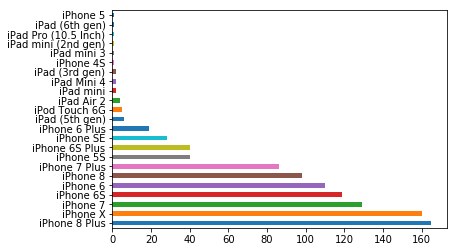

In [21]:
sub_set['DEVICE_MODEL'].value_counts()[:30].plot(kind='barh')

#### Customer Demography

In [22]:
country_df = c_df[['COUNTRY','CUSTOMER_ID_CAT']]
country_df = country_df.drop_duplicates(keep='first')
country_df.groupby('COUNTRY').size().reset_index(name='counts')

,COUNTRY,counts
0,ae,7
1,al,1
2,ar,10
3,at,1
4,au,16
5,az,1
6,be,8
7,bh,2
8,br,72
9,by,1


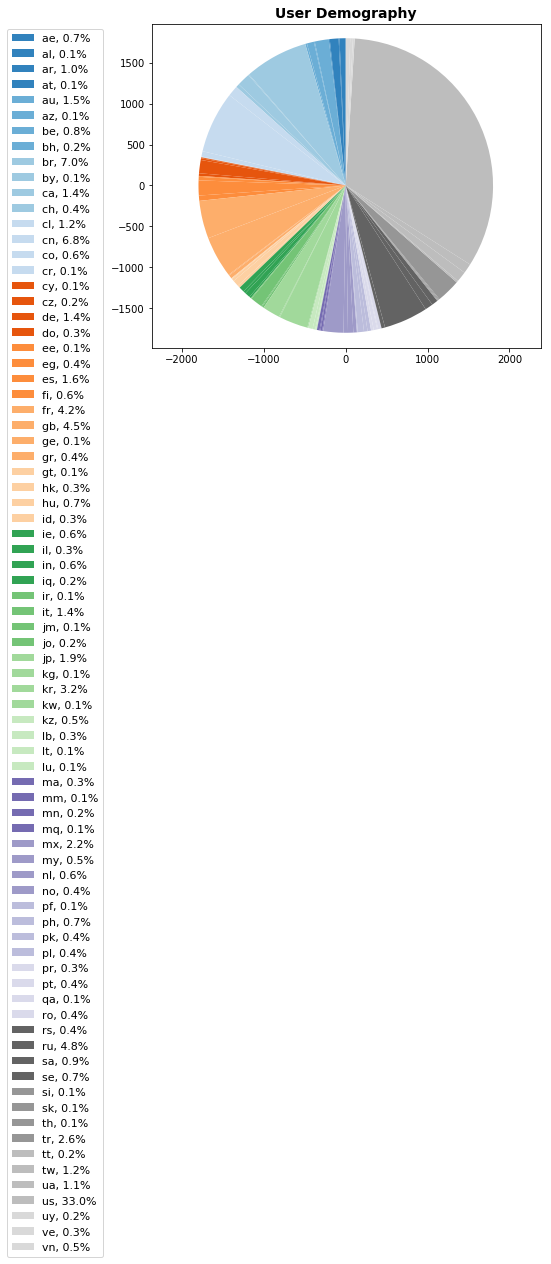

In [24]:
# Plot pie chart
sizes = country_df.groupby('COUNTRY').size().reset_index(name='counts')['counts']
labels = country_df.groupby('COUNTRY').size().reset_index(name='counts')['COUNTRY']
NUM_COLORS = len(sizes)


fig1, ax1 = plt.subplots(figsize=(6, 5))
fig1.subplots_adjust(0.1,0.1,1,1)

#set these
theme = plt.get_cmap('tab20c')
plt.title('User Demography', weight='bold', size=14)
ax1.set_prop_cycle("color", [theme(1. * i / len(sizes)) for i in range(len(sizes))])
ax1.pie(sizes, startangle=90, radius=1800, frame='FALSE')
ax1.axis('equal')

total = sum(sizes)

#draw legend
plt.legend(
    loc='upper right',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100) for l, s in zip(labels, sizes)],
    prop={'size': 11},
    bbox_to_anchor=(0.0, 1),
    bbox_transform=fig1.transFigure
)

plt.show()


